Lab on Linear Regression is a python adaptation of p. 109-119 of "Introduction to Statistical Learning with Applications in R"

### 3.6.1 Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

In [3]:
df = pd.read_csv('../data/Boston.csv', index_col=0)
df.head(2)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

   black  lstat  medv  
1  396.9   4.98  24.0  
2  396.9   9.14  21.6

### 3.6.2 Simple Linear Regression

In [4]:
rule = 'medv ~ lstat'
lm = sm.OLS.from_formula(rule, df)
result = lm.fit()

In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           5.08e-88
Time:                        14:28:30   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

(0.5441462975864797, 601.6178711098953, 34.55384087938312, -0.9500493537579906)

In [31]:
#### Predict for new data
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=["Intercept", "lstat"])

### Predict
result.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [32]:
#### Prediction with confidence interval
def predict(res, new):
    
    # get predicted values
    fit = pd.DataFrame(res.predict(new), columns=["fit"])
    
    # get the confidence interval for the model coefficients
    ci = res.conf_int().rename(columns = {0: 'lower', 1: 'upper'})
    
    # calculate CI for new data prediction
    ci = ci.T.dot(new.T).T
    
    df = pd.concat([fit, ci], axis = 1)
    
    return df

In [33]:
predict(result, new)

fit      lower      upper
0  29.803594  28.317716  31.289472
1  25.053347  23.186975  26.919720
2  20.303101  18.056234  22.549967

#### plot  medv  and  lstat  along with the least squares regression line 

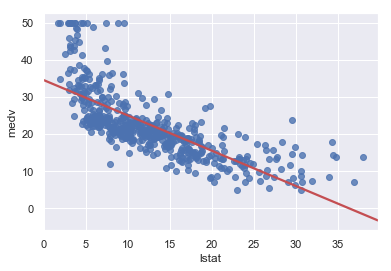

In [36]:
sns.regplot("lstat", "medv", data= df, line_kws={"color": "r"}, ci = None)
plt.show()

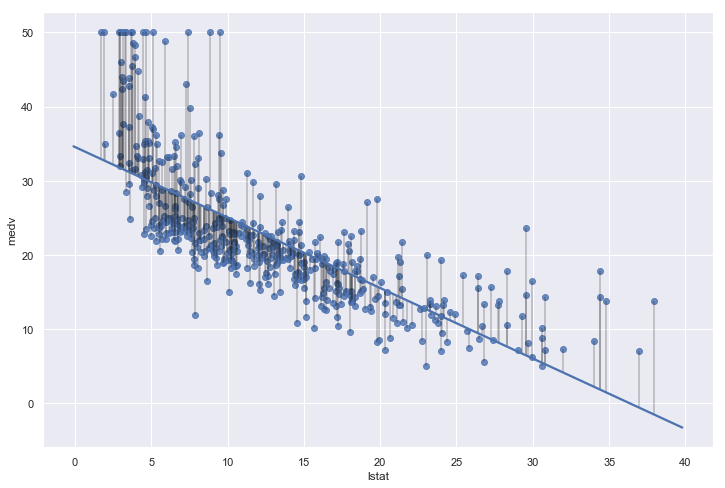

In [93]:
fit = np.polyfit(df["lstat"], df["medv"], deg=1)
y_hat = fit[1] + df["lstat"] * fit[0]

plt.figure(figsize=(12, 8))
sns.regplot("lstat", "medv", df, ci = None)
plt.vlines(df["lstat"], y_hat, df["medv"], lw = .4)

plt.show()

#### Plot the residuals against the fitted values:

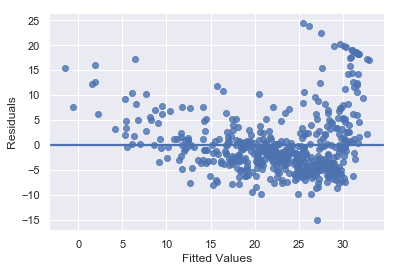

In [39]:
fitted_values = pd.Series(result.fittedvalues, name = "Fitted Values")
residuals = pd.Series(result.resid, name = "Residuals")

sns.regplot(fitted_values, residuals, ci= None)
plt.show()

 #### normalized residuals

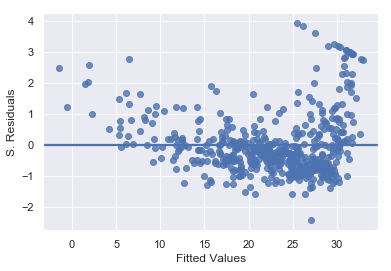

In [42]:
s_residuals = pd.Series(result.resid_pearson, name = "S. Residuals")

sns.regplot(fitted_values, s_residuals, ci = None)
plt.show()

#### points with high leverage

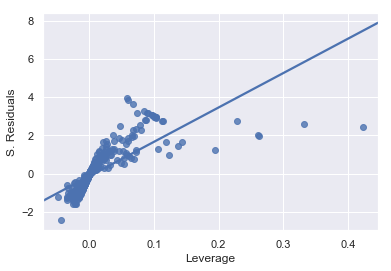

In [45]:
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")

sns.regplot(leverage, s_residuals, ci = None)
plt.show()

### 3.6.3 Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the ${\tt from\_formula()}$ function. The syntax ${\tt from\_formula(y∼x1+x2+x3)}$ is used to fit a model with three predictors, $x1$, $x2$, and $x3$. The ${\tt summary()}$ function now outputs the regression coefficients for all the predictors.

In [87]:
formula = "medv ~ lstat + age"
model = sm.OLS.from_formula(formula, df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.98e-88
Time:                        21:03:45   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [58]:
# All columns (except medv, which is our response)
formula = 'medv ~ ' + ' + '.join(df.columns.difference(["medv"]))
model = sm.OLS.from_formula(formula, df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          6.72e-135
Time:                        20:33:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# All columns (except medv, age, indus which is our response)
formula = 'medv ~ ' + ' + '.join(df.columns.difference(["medv", "age", "indus"]))
model = sm.OLS.from_formula(formula, df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          5.54e-137
Time:                        20:35:08   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
black          0.0093      0.003      3.475      0.001       0.004       0.015
chas           2.7187      0.854      3.183      0.002       1.040       4.397
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
rad            0.2996      0.063      4.726      0.000       0.175       0.424
rm             3.8016      0.406      9.356      0.000       3.003       4.600
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
zn             0.0458      0.014      3.390      0.001       0.019       0.072
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the ${\tt .from\_formula()}$ function. The syntax ${\tt lstat:black}$ tells Python to include an interaction term between ${\tt lstat}$ and ${\tt black}$. The syntax ${\tt lstat*age}$ simultaneously includes ${\tt lstat}$, ${\tt age}$, and the interaction term ${\tt lstat×age}$ as predictors; it is a shorthand for ${\tt lstat+age+lstat:age}$.

In [62]:
formula = "medv ~ lstat + age + lstat * age"
model = sm.OLS.from_formula(formula, df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           4.86e-88
Time:                        20:37:49   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.6.5 Non-linear Transformations of the Predictors

The ${\tt .from\_formula()}$ function can also accommodate non-linear transformations of the predictors. For instance, given a predictor ${\tt X}$, we can create a predictor ${\tt X^\wedge2}$ using ${\tt np.square(X)}$. We now perform a regression of ${\tt medv}$ onto ${\tt lstat}$ and ${\tt lstat^\wedge 2}$.

In [66]:
formula = "medv ~ lstat + np.square(lstat)"
model = sm.OLS.from_formula(formula, df)

result_2 = model.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          1.56e-112
Time:                        20:42:09   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872     49.149      0.000      41.149      44.575
lstat               -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.square(lstat)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the  𝚊𝚗𝚘𝚟𝚊⎯𝚕𝚖()anova_lm()  function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [70]:
formula = "medv ~ lstat"
model = sm.OLS.from_formula(formula, df)

result = model.fit()

#### ANOVA Table
sm.stats.anova_lm(result, result_2)

C:\DS_Softwares\anaconda3\envs\tensorflowcpu\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\DS_Softwares\anaconda3\envs\tensorflowcpu\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\DS_Softwares\anaconda3\envs\tensorflowcpu\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28

Here Model 0 represents the linear submodel containing only one predictor, ${\tt lstat}$, while Model 1 corresponds to the larger quadraticmodel that has two predictors, ${\tt lstat}$ and ${\tt lstat2}$. The ${\tt anova\_lm()}$ function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. 

The F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors ${\tt lstat}$ and ${\tt lstat2}$ is far superior to the model that only contains the predictor ${\tt lstat}$. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between ${\tt medv}$ and ${\tt lstat}$. 

If we type:

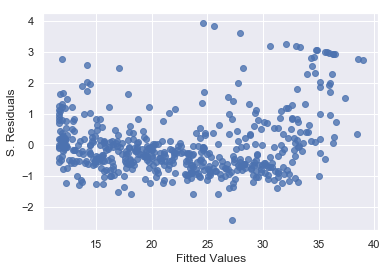

In [71]:
fitted_values = pd.Series(result_2.fittedvalues, name="Fitted Values")
residuals = pd.Series(result_2.resid, name="S. Residuals")

sns.regplot(fitted_values, s_residuals,  fit_reg=False)
plt.show()

In order to create a cubic fit, we can include a predictor of the form  𝚗𝚙.𝚙𝚘𝚠𝚎𝚛(𝚡,𝟹))np.power(x,3)) . However, this approach can start to get cumbersome for higher order polynomials. A better approach involves using list comprehension inside a  .𝚓𝚘𝚒𝚗().join() . For example, the following command produces a fifth-order polynomial fit:

In [75]:
formula = "medv ~ " + " + ".join(["np.power(lstat, " + str(i) + ")" for i in range(1, 6)])
model = sm.OLS.from_formula(formula, df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          8.73e-122
Time:                        20:47:47   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Log Transformation

In [77]:
formula = "medv ~ np.log(rm)"
model = sm.OLS.from_formula(formula, df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.22e-64
Time:                        20:48:58   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.6.6 Qualitative Predictors

We will now examine the ${\tt Carseats}$ data, which is part of the ${\tt ISLR}$ library. We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

In [80]:
df2 = pd.read_csv('../data/Carseats.csv')
df2 = df2.drop("Unnamed: 0", axis = 1)
df2.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, Python generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [81]:
formula = "Sales ~ Income:Advertising + Price:Age + " + " + ".join(df2.columns.difference(["Sales"]))
model = sm.OLS.from_formula(formula, df2)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 03 Dec 2018   Prob (F-statistic):          6.14e-166
Time:                        20:52:38   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""